## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

## Import Dataset

In [2]:
df = pd.read_csv('data_collection/data.csv')
df.shape

(145, 4)

In [3]:
#drop all rows with missing articles
df.dropna(inplace=True)


In [4]:
df.shape

(144, 4)

## Data Cleaning / Preprocessing

In [5]:
#create a function that removes any puncuation and numbers and converts all letters to lower case
import re

def clean_text(string):
    clean_text = re.sub("[^a-zA-Z\s]", " ", string)
    #covert all test to lowercase
    lower_text = clean_text.lower()
    single_white_space_text = re.sub("\s+", " ", lower_text)
    return single_white_space_text

In [6]:
#apply clean_text function to every article and create new feature

df['clean_text'] = df.text.apply(lambda x: clean_text(x))


In [33]:
#now lets tokenize each review so we have a list of words for each document

def text_preprocessor(string):
    tokenize_review = string.split()
    word_list = []
    #let's remove any word that has less than 3 letters. this will take care of indefinite articles and former contractions that 
    #resulted in single letter words after removing punctuations.
    for word in tokenize_review:
        if len(word) > 2:
            word_list.append(word)
    #now let's remove english stopwords
    filtered_wordlist = []
    for word in word_list:
        if word not in stopwords.words('english'):
            filtered_wordlist.append(word)
    #now let's lemmatize each item so that words with similar inflections will be counted as one item
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in filtered_wordlist:
        lemmatized_words.append(lemmatizer.lemmatize(word))

    return lemmatized_words                        
        

    

In [36]:
#now let's apply the the text_preprocessor to each article and create a new feature

df['processed_text'] = df.clean_text.apply(lambda x: text_preprocessor(x))

## Exploratory Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

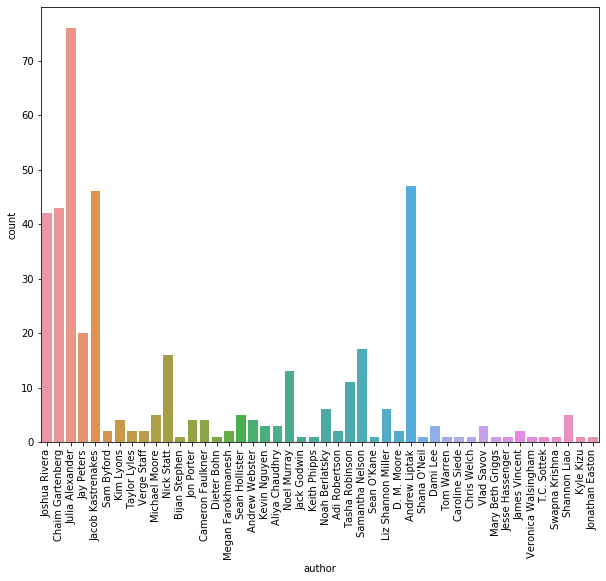

In [71]:
#let's visualize the amount of reviews each author has written
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='author')
plt.xticks(rotation=90)
